# **Predicting the Energy output of wind turbine based on weather condition**

Importing the required Libraries


In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
dataset=pd.read_csv('/content/T1.csv')

In [3]:
dataset.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
dataset.shape

(15592, 5)

In [5]:
dataset.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15592 entries, 0 to 15591
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      15592 non-null  object 
 1   LV ActivePower (kW)            15592 non-null  float64
 2   Wind Speed (m/s)               15592 non-null  float64
 3   Theoretical_Power_Curve (KWh)  15591 non-null  float64
 4   Wind Direction (°)             15591 non-null  float64
dtypes: float64(4), object(1)
memory usage: 609.2+ KB


In [7]:
dataset.drop('Date/Time',axis=1,inplace=True)

In [8]:
dataset['Wind Speed (m/s)'].fillna(0,inplace=True)

dataset['Theoretical_Power_Curve (KWh)'].fillna(dataset['Theoretical_Power_Curve (KWh)'].mean(),inplace=True)

dataset['Wind Direction (°)'].fillna(0,inplace=True)


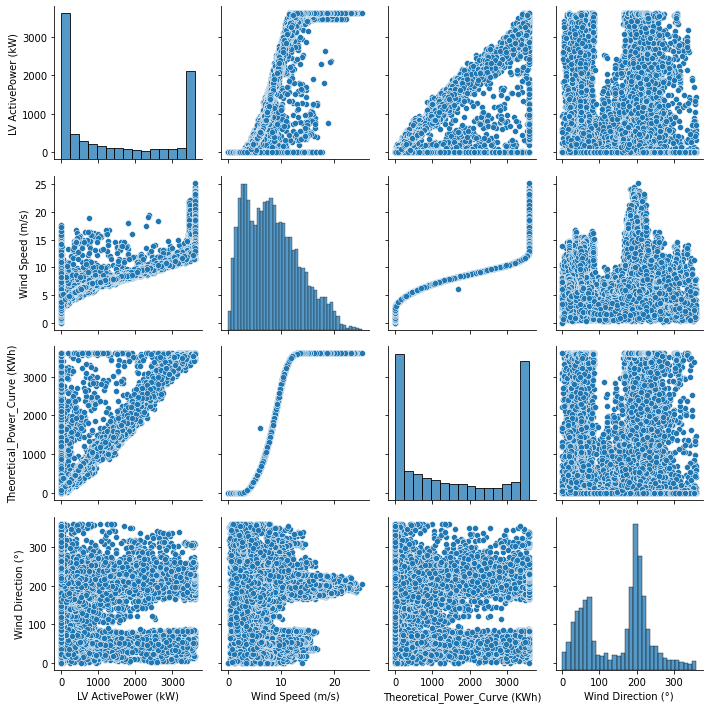

In [9]:
import seaborn as sns
sns.pairplot(dataset)

In [10]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,15592.000000,15592.000000,15592.000000,15592.000000
mean,1441.944076,8.317451,1686.289387,153.193299
std,1448.928031,5.007434,1463.902085,84.944224
min,-2.471405,0.000000,0.000000,0.000000
25%,0.000000,4.089062,139.713986,67.078119
50%,876.228912,7.731766,1381.008161,186.047302
75%,3124.678467,11.665790,3460.133373,210.337299
max,3605.758057,25.206011,3600.000000,359.977295


Checking the Outlier 

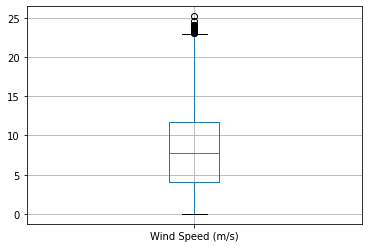

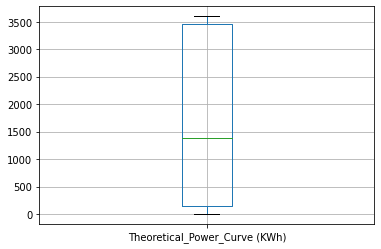

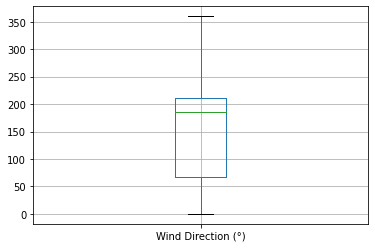

In [11]:
import matplotlib.pyplot as plt 
for i in dataset.columns:
  if i=='LV ActivePower (kW)':
    continue
  dataset.boxplot(column=i) 
  plt.show()

In [12]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    upp_range=q3+(1.5*iqr)
    return low_range,upp_range

In [13]:
low,upp=remove_outlier(dataset["Wind Speed (m/s)"])
dataset["Wind Speed (m/s)"]=np.where(dataset["Wind Speed (m/s)"]>upp,upp,dataset["Wind Speed (m/s)"])
dataset["Wind Speed (m/s)"]=np.where(dataset["Wind Speed (m/s)"]<low,low,dataset["Wind Speed (m/s)"])

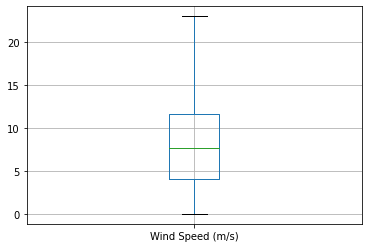

In [14]:
dataset.boxplot("Wind Speed (m/s)") 
plt.show()

Independent and dependent features

In [15]:
X=dataset.iloc[:,2:]
y=dataset.iloc[:,1]


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

Implementing the Linear Regression Algorithm

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regressor.predict(X_test)

array([3.00489336, 3.23672568, 7.23710812, ..., 8.82815983, 4.32548951,
       3.14168856])

In [20]:
pickle.dump(regressor,open('model.pkl','wb'))